
# Project: Investigate the Tmdb Movie Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><a href="#q1">Question 1 : Does a movie's budget have an influence on its popularity and its rating?</a></ul>
    <ul><a href="#q2">Question 2 : How have profits evolved over the years?</a></ul>
    <ul><a href="#q3">Question 3 : Which five directors have made the most profit from their films?</a></ul>
    <ul><a href="#q4">Question 4 : Which five actors have made the most profit from their films?</a></ul>
    <ul><a href="#q5">Question 5 : Which five production companies have made the most profit from their films?</a></ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Tmdb Dataset contains information about 10 000 Movies including user ratings, budget and revenue for example.
We will use it to answer question like who are the 5 movies director with the most profit for example.

In [1]:
# Use this cell to set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


As we can see, the columns cast,genres and production_companies are several values separate with '|'

##### Display the dimension of our dataset

In [3]:
df.shape

(10866, 21)

##### Display summary statistics

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


With the summary statistics, we can see that the majority of rating are between 6 and 7. The majority of movies were released from 2006 onwards.
We can also see, that many column have 0 as value.

##### Check the data for each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that cast, homepage, tagline, keywords, overview, genres, and production_companies have some missing values

In [6]:
#Check to duplicate
sum(df.duplicated())

1

We have one duplicate! Let's show that

In [7]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0



### Data Cleaning 

We will clean our data set. First we delete the duplicate.
Then we delete the column we don't need.
After that, we remplace 0 by NaN.A movie with no budget,no revenue,is probably a wrong entry. 
And we will delete all the row with NaN as value because we can't make our Analysis with some rows.
Finally we will make new column for all the column with several values and we will add a column profit


##### Dealing with duplicate

In [8]:
# Delete the duplicate
df.drop_duplicates(keep=False,inplace= True)

#Check that the duplicate is gone
sum(df.duplicated())

0

##### Drop the columns we don't need for our analysis

In [9]:
# Delete columns that are irrelevant for the analysis

df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget','revenue','runtime'],axis=1,inplace=True)

In [10]:
# View to check drop
df.head(2)

,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


##### Dealing with 0 and missing values

In [13]:
# Replace 0 with Nan
df['budget_adj'].replace(0, np.NAN, inplace = True)
df['revenue_adj'].replace(0, np.NAN, inplace = True)

# Drop the rows with NAN as value
df.dropna(axis=0,inplace=True)

In [14]:
# Check that all the rows with NAN are gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3804 non-null   float64
 1   original_title        3804 non-null   object 
 2   cast                  3804 non-null   object 
 3   director              3804 non-null   object 
 4   genres                3804 non-null   object 
 5   production_companies  3804 non-null   object 
 6   release_date          3804 non-null   object 
 7   vote_count            3804 non-null   int64  
 8   vote_average          3804 non-null   float64
 9   release_year          3804 non-null   int64  
 10  budget_adj            3804 non-null   float64
 11  revenue_adj           3804 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 386.3+ KB


##### Dealing with several value in a column

In [15]:
#In column with several value, separating the value and create new column for each one
#Source : https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python

actors = df['cast'].str.split('|',expand = True).rename(columns = lambda x: f"cast_"+str(x+1))
genre = df['genres'].str.split('|',expand = True).rename(columns = lambda x: f"genres_"+str(x+1))
production_company = df['production_companies'].str.split('|',expand = True).rename(columns = lambda x: f"production_companies_"+str(x+1))

#Check that the split work

actors.head(1)

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


In [16]:
#Add the new columns to the dataframe and drop the old with several values
df = df.join([actors,genre,production_company])
df = df.drop(['cast','genres','production_companies'],axis=1)


In [17]:
#Check that join and drop work
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 10848
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   popularity              3804 non-null   float64
 1   original_title          3804 non-null   object 
 2   director                3804 non-null   object 
 3   release_date            3804 non-null   object 
 4   vote_count              3804 non-null   int64  
 5   vote_average            3804 non-null   float64
 6   release_year            3804 non-null   int64  
 7   budget_adj              3804 non-null   float64
 8   revenue_adj             3804 non-null   float64
 9   cast_1                  3804 non-null   object 
 10  cast_2                  3801 non-null   object 
 11  cast_3                  3801 non-null   object 
 12  cast_4                  3793 non-null   object 
 13  cast_5                  3775 non-null   object 
 14  genres_1                3804 non-null  

##### New Column Profit

In [18]:
#add the new column in our DataFrame
df['profit']=df['revenue_adj']-df['budget_adj']

#check if it'S work
df.head(1)

,popularity,original_title,director,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,...,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5,profit
0,32.985763,Jurassic World,Colin Trevorrow,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,...,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1.254446e+09


Our dataset is now ready for the Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis

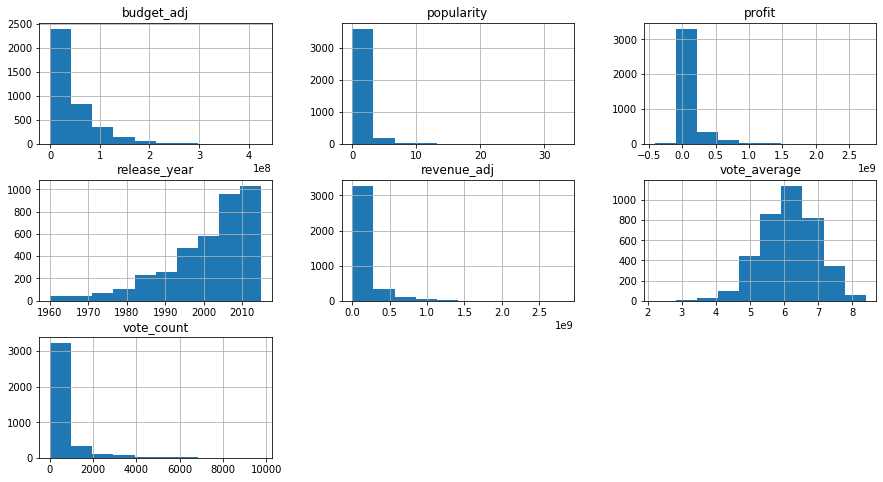

In [19]:
# Explore the histogram of the data
df.hist(figsize=(15,8));

With the help of these histograms, we can already notice that the number of films to be released per year has increased. We are also able to see that there are more films with a rating below the mean than above.

<a id='q1'></a>
### Question 1 : Does a movie's budget have an influence on its popularity and its rating? 

In [18]:
# View the min, 25%, 50%, 75%, max budget_adj values with Pandas describe
df.describe().budget_adj

count    3.804000e+03
mean     4.472363e+07
std      4.489224e+07
min      9.693980e-01
25%      1.354637e+07
50%      3.038730e+07
75%      6.087715e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [19]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [9.693980e-01,1.354637e+07,3.038730e+07,6.087715e+07,4.250000e+08]# Fill in this list with five values we just found
# Labels for the fourbudget level groups
bin_names = ['Low Budget','Medium Budget','Moderate High Budget','High Budget']


In [20]:
# Creates budget_levels column
df['budget_levels']=pd.cut(df['budget_adj'],bin_edges,labels=bin_names)
# Checks for successful creation of this column
df.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5,profit,budget_levels
0,32.985763,Jurassic World,Colin Trevorrow,124.0,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,...,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1.254446e+09,High Budget
1,28.419936,Mad Max: Fury Road,George Miller,120.0,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,...,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,2.101614e+08,High Budget
2,13.112507,Insurgent,Robert Schwentke,119.0,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,...,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,1.704191e+08,High Budget
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,...,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None,1.718723e+09,High Budget
4,9.335014,Furious 7,James Wan,137.0,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,...,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1.210949e+09,High Budget


In [21]:
# Find the mean popularity of each budget level with groupby
df.groupby('budget_levels')['popularity'].mean()

budget_levels
Low Budget              0.731460
Medium Budget           0.936378
Moderate High Budget    1.171310
High Budget             1.977275
Name: popularity, dtype: float64

In [22]:
# Save the mean as variable for our Graphic
mean_pop = df.groupby('budget_levels')['popularity'].mean()

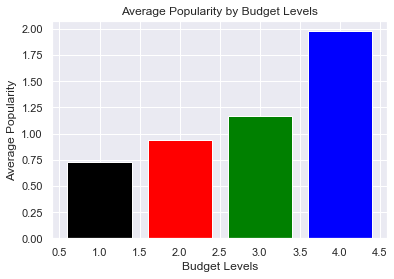

In [23]:
# Create a bar chart with proper labels
sns.set()
locations = [1,2,3,4]
heights = [mean_pop[0],mean_pop[1],mean_pop[2],mean_pop[3]]
labels = ['Low Budget','Medium Budget',' Moderate High Budget','High Budget']
plt.bar(locations,heights,color=['black', 'red', 'green', 'blue'])
plt.title('Average Popularity by Budget Levels')
plt.xlabel('Budget Levels')
plt.ylabel('Average Popularity');

As we can see, the higher the budget, the higher the popularity. Movie with less budget are less popular

In [24]:
#same step as above
df.groupby('budget_levels')['vote_average'].mean()

budget_levels
Low Budget              6.182180
Medium Budget           6.176055
Moderate High Budget    6.152997
High Budget             6.172240
Name: vote_average, dtype: float64

In [25]:
mean_avg = df.groupby('budget_levels')['vote_average'].mean()

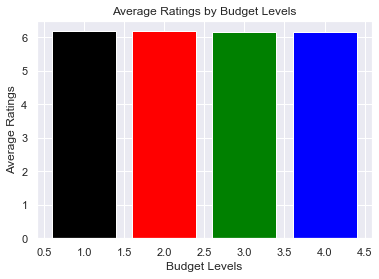

In [26]:
sns.set()
locations = [1,2,3,4]
heights = [mean_avg[0],mean_avg[1],mean_avg[2],mean_avg[3]]
labels = ['Low Budget','Medium Budget',' Moderate High Budget','High Budget']
plt.bar(locations,heights,color=['black','red', 'green', 'blue'])
plt.title('Average Ratings by Budget Levels')
plt.xlabel('Budget Levels')
plt.ylabel('Average Ratings');

The budget seems to have no influence on the rating.High or Low Budget doesn't mean a good or bad ratings. But let show us a little bit more

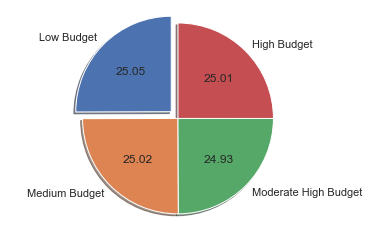

In [27]:
#Create a pie graphic to see in percent which budget level have the best rating average
labels = 'Low Budget', 'Medium Budget', 'Moderate High Budget', 'High Budget'
sizes = [6.182180,6.176055,6.152997, 6.172240]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.2f',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As we can see, low-budget films have the highest ratings. That said, the difference is too small to say that a low-budget film will be better appreciated than a high-budget film.

<a id='q2'></a>
### Question 2  : How have profits evolved over the years?

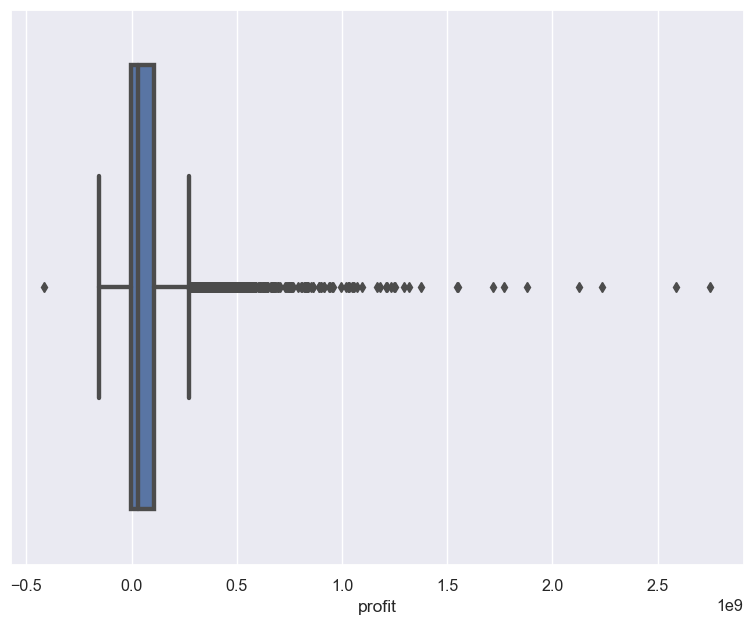

In [36]:
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['profit'], linewidth = 3)
#diplaying the plot
plt.show()

As we can see, a lot of value seems to be outside the box, that's why we need to take a closer look at these to see if they're outliers or not.

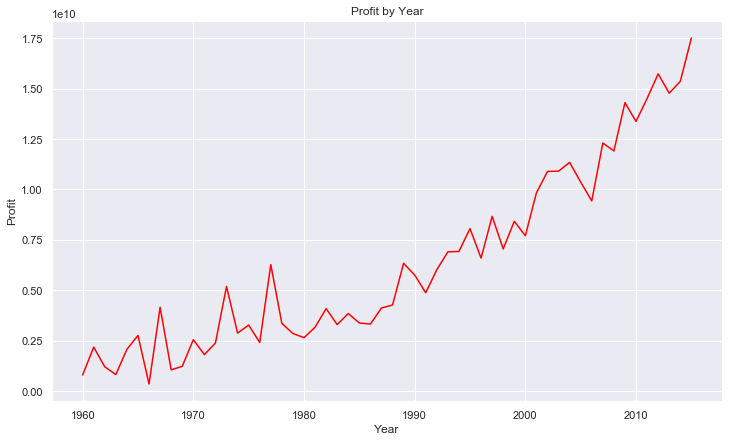

In [28]:
#Calculate the profit for each year with groupby
profit_by_year = df.groupby('release_year')['profit'].sum()
#Create a line graphic
sns.set()
plt.figure(figsize=(12,7))
plt.plot(profit_by_year,color='red')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by Year');

As we can see, the profits are increasing, especially since 2000.This increase can we see in the first graphic. That's the values outside the box.

<a id='q3'></a>
### Question 3  : Which five directors have made the most profit from their films?

In [30]:
#make a new dataframe with director and profit
director_and_profit = df[['director','profit']]

In [31]:
#Calculate the profit for each director with groupby
profit_dir = director_and_profit.groupby('director')['profit'].sum()
#Sort the results 
profit_dir=profit_dir.reset_index().sort_values(['profit'],ascending=False).set_index(['director'])
#Take the first 5
profit_dir = profit_dir.head(5)

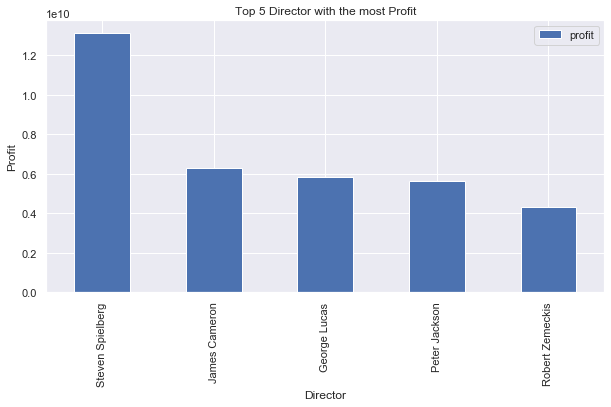

In [32]:
#Make a bar graphic
sns.set()
profit_dir.plot(kind='bar',figsize=(10,5))
plt.xlabel('Director')
plt.ylabel('Profit')
plt.title('Top 5 Director with the most Profit');

Steven Spielberg is, without question, the one who has made the most money from these films.
He made about twice as much as our second, James Cameron.
From 2nd to 4th place the difference is not huge between James Cameron, George Lucas and Peter Jackson.
5th in this ranking, Robert Zemeckis who are a little further back.

<a id='q4'></a>
### Question 4  : Which five actors have made the most profit from their films?

In [33]:
#Make a dataframe with all the cast column
cast = df.loc[:,'cast_1':'cast_5']
#Stack the column to have just one
cast = cast.stack().reset_index().rename(columns={0:'cast'})
#Join the profit column
cast_1 = cast.join(df['profit'])
#Drop the column we don't need
cast_1.drop(['level_0','level_1'],axis=1,inplace=True)
#Fill with 0 the nan values.
cast_1= cast_1.fillna(0)
#Calculate the profit for each actor with groupby and agg
cast_2 = cast_1.groupby(['cast']).agg('sum')
#Sort the values
cast_2 = cast_2.sort_values(['profit'],ascending=False).head(5)
cast_2


,profit
cast,
Miles Teller,4.372687e+09
Meryl Streep,4.258930e+09
Ben Kingsley,2.573301e+09
Aunjanue Ellis,2.408809e+09
June Squibb,1.891062e+09


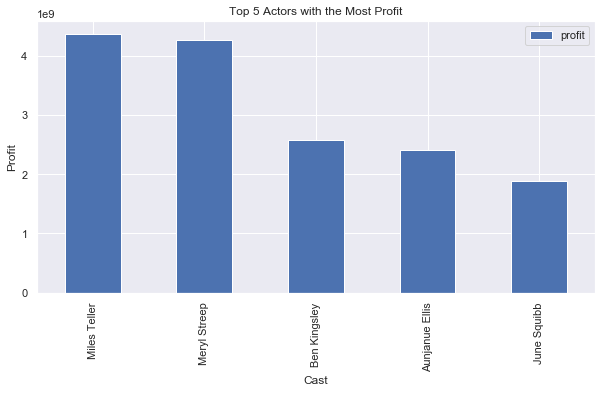

In [34]:
#Make a bar graphic
cast_2.plot(kind='bar',figsize=(10,5))
plt.xlabel('Cast')
plt.ylabel('Profit')
plt.title('Top 5 Actors with the Most Profit');

Miles Teller and Meryl Streep, respectively first and second, are the actors with the most profit from these film.
The difference between these is not so high.
Further back, are Ben Kingsley,Aunjanue Ellis and June Squibb,respectively third,fourth and fifth

<a id='q5'></a>
### Question 5  : Which five production companies have made the most profit from their films?

In [35]:
#same step as above
prod_comp = df.loc[:,'production_companies_1':'production_companies_5']
prod_comp = prod_comp.stack().reset_index().rename(columns={0:'production_comp'})
prod_comp_1 = prod_comp.join(df['profit'])
prod_comp_1.drop(['level_0','level_1'],axis=1,inplace=True)

prod_comp_1= prod_comp_1.fillna(0)
prod_comp_2 = prod_comp_1.groupby(['production_comp']).agg('sum')
prod_comp_2 = prod_comp_2.sort_values(['profit'],ascending=False).head(5)
prod_comp_2

,profit
production_comp,
Universal Pictures,1.336716e+10
Warner Bros.,1.312554e+10
Paramount Pictures,1.125509e+10
Twentieth Century Fox Film Corporation,6.235702e+09
Relativity Media,5.529672e+09


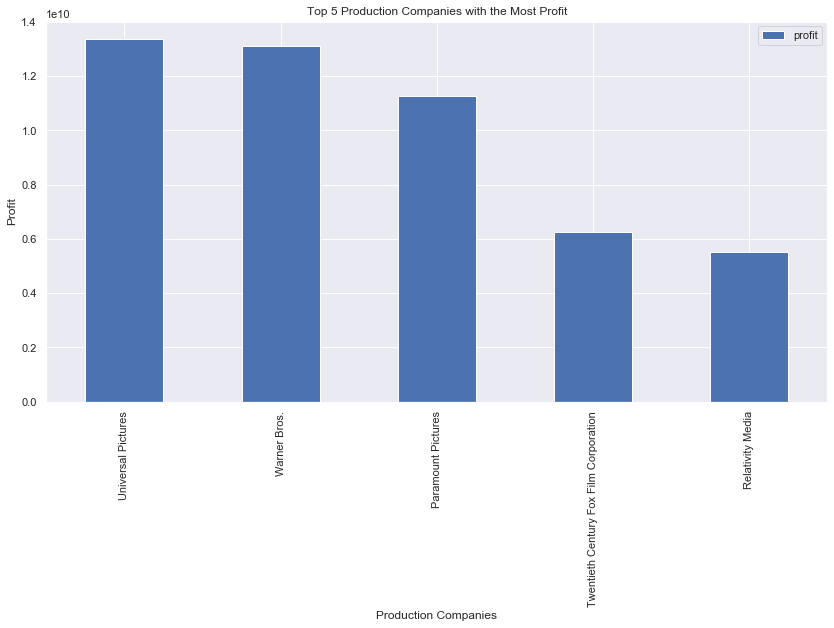

In [36]:
prod_comp_2.plot(kind='bar',figsize=(14,7))
plt.xlabel('Production Companies')
plt.ylabel('Profit')
plt.title('Top 5 Production Companies with the Most Profit');

At least we see the top 5 Production Companies with the most profit.
The first and the second place are for Universal Pictures and Warner Bros with a slight advantage for Universal.
Well settled in third place, we have the Paramount Pictures.
And further rank, we have the 20Th Century Fox in fourth place and Relativity Media in fifth place.

<a id='conclusions'></a>
## Conclusions

After analysing this data, we can say that cinema has a very bright future ahead of it in terms of profit.

The high-budget films will continue to be more popular than low-budget ones.
But it will be interesting to see whether low budgets continue to defend themselves just as well in terms of ratings or whether they will do even better. But for sure hgh budget and high popularity doesn't meen a better rating.

Taking into account our previous top 5, we can also claim that a film produced by Universal Pictures or Warner Bros, with Steven Spielberg as the director, and Miles Teller or Meryl Streep as the lead actor, would have a very good chance of making a lot of profit.

##### Limitation :

This analysis was done considering the underlying data set.
Many entries have been removed due to missing data, the overall analysis is also affected.
To calculate the profit, i take the adjusted budget and adjusted revenue. That's meen the profit is in terms of 2010 dollars, accounting for inflation over time.
So now if we want to be more precise, we should have a new budget and adjusted revenue in terms of 2020 dollars.
That's why this analysis might not be completelery error free and can only be treated as indicator.

